In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Task 1:

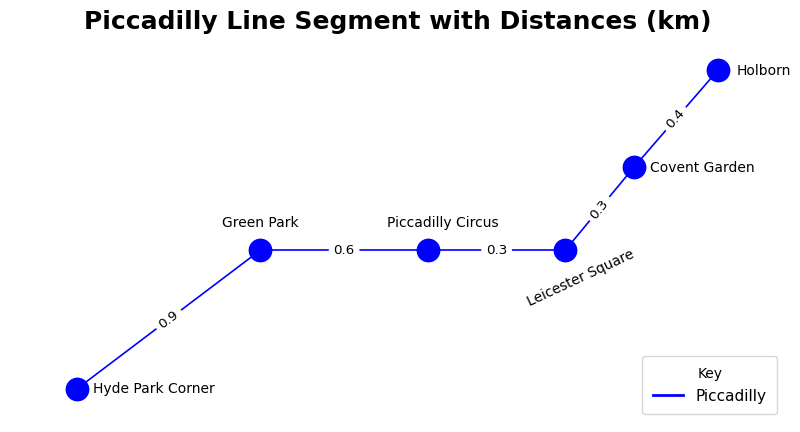

In [6]:
# Define stations and distances between them (in km)
stations = [
    "Hyde Park Corner", "Green Park", "Piccadilly Circus",
    "Leicester Square", "Covent Garden", "Holborn"
]

# Distances between each pair of stations (in km)
distances = {
    ("Hyde Park Corner", "Green Park"): 0.9,
    ("Green Park", "Piccadilly Circus"): 0.6,
    ("Piccadilly Circus", "Leicester Square"): 0.3,
    ("Leicester Square", "Covent Garden"): 0.3,
    ("Covent Garden", "Holborn"): 0.4
}

# Initialize the graph
G = nx.Graph()

# Add edges to the graph with distances as weights
for (station1, station2), distance in distances.items():
    G.add_edge(station1, station2, weight=distance)

# Define manual layout positions to match the original diagram
pos = {
    "Hyde Park Corner": (0, 0),
    "Green Park": (1.2, 1),
    "Piccadilly Circus": (2.3, 1),
    "Leicester Square": (3.2, 1),
    "Covent Garden": (3.65, 1.6),
    "Holborn": (4.2, 2.3)
}

# Setup the graph
plt.figure(figsize=(10, 5))
plt.title("Piccadilly Line Segment with Distances (km)", fontsize=18, fontweight="bold")

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=260, node_color="blue")
nx.draw_networkx_edges(G, pos, width=1.2, edge_color="blue")

# Labels for stations
plt.text(0.5, 0, "Hyde Park Corner", fontsize=10, fontfamily="sans-serif", color="black", rotation=0, ha="center", va="center")
plt.text(1.2, 1.2, "Green Park", fontsize=10, fontfamily="sans-serif", color="black", rotation=0, ha="center", va="center")
plt.text(2.4, 1.2, "Piccadilly Circus", fontsize=10, fontfamily="sans-serif", color="black", rotation=0, ha="center", va="center")
plt.text(3.3, 0.8, "Leicester Square", fontsize=10, fontfamily="sans-serif", color="black", rotation=25, ha="center", va="center")
plt.text(4.1, 1.6, "Covent Garden", fontsize=10, fontfamily="sans-serif", color="black", rotation=0, ha="center", va="center")
plt.text(4.5, 2.3, "Holborn", fontsize=10, fontfamily="sans-serif", color="black", rotation=0, ha="center", va="center")

# Add labels for distances on the edges
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9.6)

# Create a legend for the Piccadilly line 
plt.plot([], [], color="blue", linewidth=2, label="Piccadilly")

# Display the legend
plt.legend(title="Key", loc="lower right", fontsize=11, borderpad=0.7)

# Show the graph
plt.axis("off")
plt.show()

# Task 2:

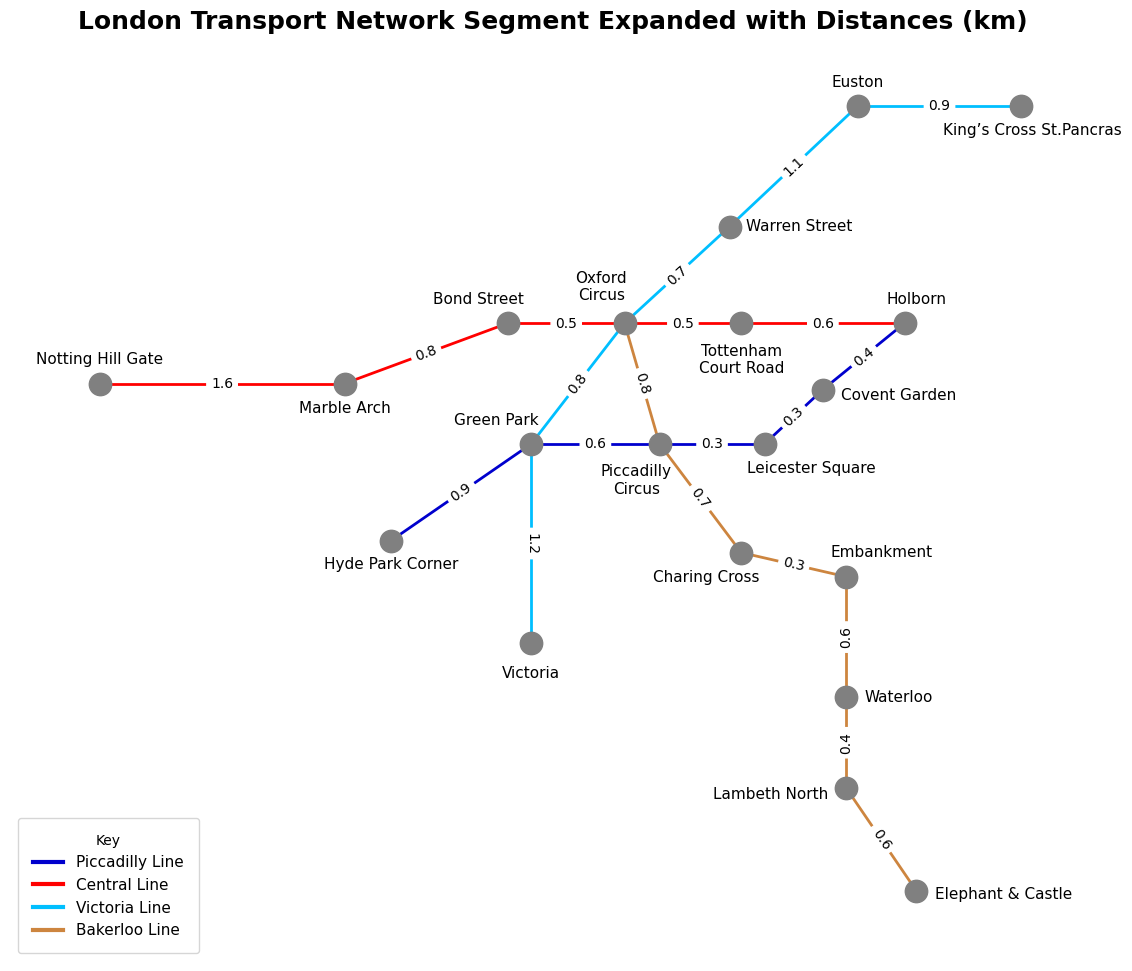

In [7]:
# Define stations for each line
stations = [
    "Hyde Park Corner", "Green Park", "Piccadilly Circus",
    "Leicester Square", "Covent Garden", "Holborn",
    "Notting Hill Gate", "Marble Arch", "Bond Street",
    "Oxford Circus", "Tottenham Court Road", "Holborn",
    "Victoria", "Green Park", "Oxford Circus",
    "Warren Street", "Euston", "King’s Cross St. Pancras",
    "Elephant & Castle", "Lambeth North", "Waterloo",
    "Embankment", "Charing Cross", "Piccadilly Circus", "Oxford Circus"
]

# Define distances between stations (in km)
distances = {
    ("Hyde Park Corner", "Green Park"): 0.9,
    ("Green Park", "Piccadilly Circus"): 0.6,
    ("Piccadilly Circus", "Leicester Square"): 0.3,
    ("Leicester Square", "Covent Garden"): 0.3,
    ("Covent Garden", "Holborn"): 0.4,
    ("Notting Hill Gate", "Marble Arch"): 1.6,
    ("Marble Arch", "Bond Street"): 0.8,
    ("Bond Street", "Oxford Circus"): 0.5,
    ("Oxford Circus", "Tottenham Court Road"): 0.5,
    ("Tottenham Court Road", "Holborn"): 0.6,
    ("Victoria", "Green Park"): 1.2,
    ("Green Park", "Oxford Circus"): 0.8,
    ("Oxford Circus", "Warren Street"): 0.7,
    ("Warren Street", "Euston"): 1.1,
    ("Euston", "King’s Cross St. Pancras"): 0.9,
    ("Elephant & Castle", "Lambeth North"): 0.6,
    ("Lambeth North", "Waterloo"): 0.4,
    ("Waterloo", "Embankment"): 0.6,
    ("Embankment", "Charing Cross"): 0.3,
    ("Charing Cross", "Piccadilly Circus"): 0.7,
    ("Piccadilly Circus", "Oxford Circus"): 0.8
}

# Initialize graph
G = nx.Graph()

# Add edges with distances as weights
for (station1, station2), distance in distances.items():
    G.add_edge(station1, station2, weight=distance)

# Define layout positions for stations
pos = {
    "Hyde Park Corner": (0, 0.2),
    "Green Park": (1.2, 1),
    "Piccadilly Circus": (2.3, 1),
    "Leicester Square": (3.2, 1),
    "Covent Garden": (3.7, 1.45),
    "Holborn": (4.4, 2),
    
    "Notting Hill Gate": (-2.5, 1.5),
    "Marble Arch": (-0.4, 1.5),
    "Bond Street": (1, 2),
    "Oxford Circus": (2, 2),
    "Tottenham Court Road": (3, 2),
    
    "Victoria": (1.2, -0.65),
    "Warren Street": (2.9, 2.8),
    "Euston": (4, 3.8),
    "King’s Cross St. Pancras": (5.4, 3.8),
     
    "Elephant & Castle": (4.5, -2.7),
    "Lambeth North": (3.9, -1.85),
    "Waterloo": (3.9, -1.1),
    "Embankment": (3.9, -0.1),
    "Charing Cross": (3, 0.1)
}

# Plot graph
plt.figure(figsize=(14, 12))
plt.title("London Transport Network Segment Expanded with Distances (km)", fontsize=18, fontweight="bold")

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=260, node_color="grey")

# Draw edges for each line
nx.draw_networkx_edges(G, pos, edgelist=[
    ("Hyde Park Corner", "Green Park"), ("Green Park", "Piccadilly Circus"), 
    ("Piccadilly Circus", "Leicester Square"), ("Leicester Square", "Covent Garden"), 
    ("Covent Garden", "Holborn")
], edge_color="mediumblue", width=2)  # Piccadilly Line

nx.draw_networkx_edges(G, pos, edgelist=[
    ("Notting Hill Gate", "Marble Arch"), ("Marble Arch", "Bond Street"),
    ("Bond Street", "Oxford Circus"), ("Oxford Circus", "Tottenham Court Road"), 
    ("Tottenham Court Road", "Holborn")
], edge_color="red", width=2)  # Central Line

nx.draw_networkx_edges(G, pos, edgelist=[
    ("Victoria", "Green Park"), ("Green Park", "Oxford Circus"),
    ("Oxford Circus", "Warren Street"), ("Warren Street", "Euston"),
    ("Euston", "King’s Cross St. Pancras")
], edge_color="deepskyblue", width=2)  # Victoria Line

nx.draw_networkx_edges(G, pos, edgelist=[
    ("Elephant & Castle", "Lambeth North"), ("Lambeth North", "Waterloo"),
    ("Waterloo", "Embankment"), ("Embankment", "Charing Cross"),
    ("Charing Cross", "Piccadilly Circus"), ("Piccadilly Circus", "Oxford Circus")
], edge_color="peru", width=2)  # Bakerloo Line

# Define layout positions for stations
label_pos = {
    "Hyde Park Corner": (0, 0),
    "Green Park": (0.9, 1.2),
    "Piccadilly\nCircus": (2.1, 0.7),
    "Leicester Square": (3.6, 0.8),
    "Covent Garden": (4.35, 1.4),
    "Holborn": (4.5, 2.2),
    
    "Notting Hill Gate": (-2.5, 1.7),
    "Marble Arch": (-0.4, 1.3),
    "Bond Street": (0.75, 2.2),
    "Oxford\nCircus": (1.8, 2.3),
    "Tottenham\nCourt Road": (3, 1.7),
    
    "Victoria": (1.2, -0.9),
    "Warren Street": (3.5, 2.8),
    "Euston": (4, 4),
    "King’s Cross St.Pancras": (5.5, 3.6),  
    
    "Elephant & Castle": (5.25, -2.73),
    "Lambeth North": (3.25, -1.9),
    "Waterloo": (4.35, -1.1),
    "Embankment": (4.2, 0.1),
    "Charing Cross": (2.7, -0.1)
}

# Add station labels
for station, (x, y) in label_pos.items():
    plt.text(x, y, station, fontsize=11, ha="center", va="center")

# Add edge labels for distances
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Custom legend using plt.scatter
plt.plot([], [], color="mediumblue", label="Piccadilly Line", linewidth=3)
plt.plot([], [], color="red", label="Central Line", linewidth=3)
plt.plot([], [], color="deepskyblue", label="Victoria Line", linewidth=3)
plt.plot([], [], color="peru", label="Bakerloo Line", linewidth=3)
plt.legend(title="Key", loc="lower left", fontsize=11, borderpad=1)

plt.axis("off")
plt.show()


# Task 3:

In [10]:
# Extract edge weights (distances) from the graph
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]

# Calculate total length of the transport network
total_length = sum(edge_weights)

# Calculate average distance between stations
average_distance = np.mean(edge_weights)

# Calculate standard deviation of the distances
std_deviation = np.std(edge_weights)

# Display the results
print(f"Total length of the transport network: {total_length:.2f} km")
print(f"Average distance between stations: {average_distance:.2f} km")
print(f"Standard deviation of distances: {std_deviation:.2f} km")

Total length of the transport network: 14.60 km
Average distance between stations: 0.70 km
Standard deviation of distances: 0.32 km


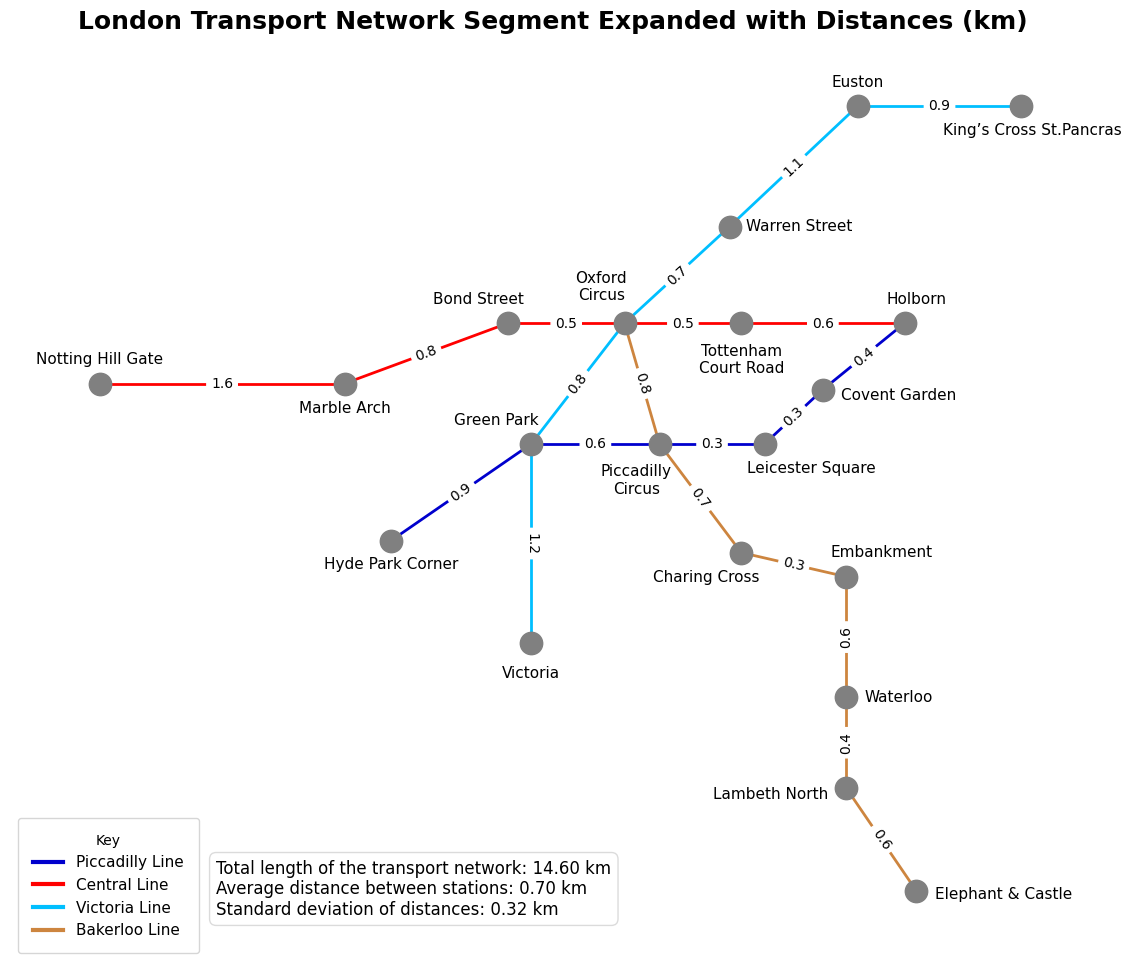

In [11]:
# Define stations for each line
stations = [
    "Hyde Park Corner", "Green Park", "Piccadilly Circus",
    "Leicester Square", "Covent Garden", "Holborn",
    "Notting Hill Gate", "Marble Arch", "Bond Street",
    "Oxford Circus", "Tottenham Court Road", "Holborn",
    "Victoria", "Green Park", "Oxford Circus",
    "Warren Street", "Euston", "King’s Cross St. Pancras",
    "Elephant & Castle", "Lambeth North", "Waterloo",
    "Embankment", "Charing Cross", "Piccadilly Circus", "Oxford Circus"
]

# Define distances between stations (in km)
distances = {
    ("Hyde Park Corner", "Green Park"): 0.9,
    ("Green Park", "Piccadilly Circus"): 0.6,
    ("Piccadilly Circus", "Leicester Square"): 0.3,
    ("Leicester Square", "Covent Garden"): 0.3,
    ("Covent Garden", "Holborn"): 0.4,
    ("Notting Hill Gate", "Marble Arch"): 1.6,
    ("Marble Arch", "Bond Street"): 0.8,
    ("Bond Street", "Oxford Circus"): 0.5,
    ("Oxford Circus", "Tottenham Court Road"): 0.5,
    ("Tottenham Court Road", "Holborn"): 0.6,
    ("Victoria", "Green Park"): 1.2,
    ("Green Park", "Oxford Circus"): 0.8,
    ("Oxford Circus", "Warren Street"): 0.7,
    ("Warren Street", "Euston"): 1.1,
    ("Euston", "King’s Cross St. Pancras"): 0.9,
    ("Elephant & Castle", "Lambeth North"): 0.6,
    ("Lambeth North", "Waterloo"): 0.4,
    ("Waterloo", "Embankment"): 0.6,
    ("Embankment", "Charing Cross"): 0.3,
    ("Charing Cross", "Piccadilly Circus"): 0.7,
    ("Piccadilly Circus", "Oxford Circus"): 0.8
}

# Initialize graph
G = nx.Graph()

# Add edges with distances as weights
for (station1, station2), distance in distances.items():
    G.add_edge(station1, station2, weight=distance)

# Define layout positions for stations
pos = {
    "Hyde Park Corner": (0, 0.2),
    "Green Park": (1.2, 1),
    "Piccadilly Circus": (2.3, 1),
    "Leicester Square": (3.2, 1),
    "Covent Garden": (3.7, 1.45),
    "Holborn": (4.4, 2),
    
    "Notting Hill Gate": (-2.5, 1.5),
    "Marble Arch": (-0.4, 1.5),
    "Bond Street": (1, 2),
    "Oxford Circus": (2, 2),
    "Tottenham Court Road": (3, 2),
    
    "Victoria": (1.2, -0.65),
    "Warren Street": (2.9, 2.8),
    "Euston": (4, 3.8),
    "King’s Cross St. Pancras": (5.4, 3.8),
     
    "Elephant & Castle": (4.5, -2.7),
    "Lambeth North": (3.9, -1.85),
    "Waterloo": (3.9, -1.1),
    "Embankment": (3.9, -0.1),
    "Charing Cross": (3, 0.1)
}

# Plot graph
plt.figure(figsize=(14, 12))
plt.title("London Transport Network Segment Expanded with Distances (km)", fontsize=18, fontweight="bold")

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=260, node_color="grey")

# Draw edges for each line
nx.draw_networkx_edges(G, pos, edgelist=[
    ("Hyde Park Corner", "Green Park"), ("Green Park", "Piccadilly Circus"), 
    ("Piccadilly Circus", "Leicester Square"), ("Leicester Square", "Covent Garden"), 
    ("Covent Garden", "Holborn")
], edge_color="mediumblue", width=2)  # Piccadilly Line

nx.draw_networkx_edges(G, pos, edgelist=[
    ("Notting Hill Gate", "Marble Arch"), ("Marble Arch", "Bond Street"),
    ("Bond Street", "Oxford Circus"), ("Oxford Circus", "Tottenham Court Road"), 
    ("Tottenham Court Road", "Holborn")
], edge_color="red", width=2)  # Central Line

nx.draw_networkx_edges(G, pos, edgelist=[
    ("Victoria", "Green Park"), ("Green Park", "Oxford Circus"),
    ("Oxford Circus", "Warren Street"), ("Warren Street", "Euston"),
    ("Euston", "King’s Cross St. Pancras")
], edge_color="deepskyblue", width=2)  # Victoria Line

nx.draw_networkx_edges(G, pos, edgelist=[
    ("Elephant & Castle", "Lambeth North"), ("Lambeth North", "Waterloo"),
    ("Waterloo", "Embankment"), ("Embankment", "Charing Cross"),
    ("Charing Cross", "Piccadilly Circus"), ("Piccadilly Circus", "Oxford Circus")
], edge_color="peru", width=2)  # Bakerloo Line

# Define layout positions for stations
label_pos = {
    "Hyde Park Corner": (0, 0),
    "Green Park": (0.9, 1.2),
    "Piccadilly\nCircus": (2.1, 0.7),
    "Leicester Square": (3.6, 0.8),
    "Covent Garden": (4.35, 1.4),
    "Holborn": (4.5, 2.2),
    
    "Notting Hill Gate": (-2.5, 1.7),
    "Marble Arch": (-0.4, 1.3),
    "Bond Street": (0.75, 2.2),
    "Oxford\nCircus": (1.8, 2.3),
    "Tottenham\nCourt Road": (3, 1.7),
    
    "Victoria": (1.2, -0.9),
    "Warren Street": (3.5, 2.8),
    "Euston": (4, 4),
    "King’s Cross St.Pancras": (5.5, 3.6),  
    
    "Elephant & Castle": (5.25, -2.73),
    "Lambeth North": (3.25, -1.9),
    "Waterloo": (4.35, -1.1),
    "Embankment": (4.2, 0.1),
    "Charing Cross": (2.7, -0.1)
}

# Add station labels
for station, (x, y) in label_pos.items():
    plt.text(x, y, station, fontsize=11, ha="center", va="center")

# Add edge labels for distances
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Custom legend using plt.scatter
plt.plot([], [], color="mediumblue", label="Piccadilly Line", linewidth=3)
plt.plot([], [], color="red", label="Central Line", linewidth=3)
plt.plot([], [], color="deepskyblue", label="Victoria Line", linewidth=3)
plt.plot([], [], color="peru", label="Bakerloo Line", linewidth=3)
plt.legend(title="Key", loc="lower left", fontsize=11, borderpad=1)

# Extract edge weights (distances) from the graph
edge_weights = [data['weight'] for _, _, data in G.edges(data=True)]

# Calculate total length of the transport network
total_length = sum(edge_weights)

# Calculate average distance between stations
average_distance = np.mean(edge_weights)

# Calculate standard deviation of the distances
std_deviation = np.std(edge_weights)

results_text = (
    f"Total length of the transport network: {total_length:.2f} km\n"
    f"Average distance between stations: {average_distance:.2f} km\n"
    f"Standard deviation of distances: {std_deviation:.2f} km"
)
plt.text(-1.5, -2.9, results_text, fontsize=12, bbox=dict(boxstyle="round,pad=0.4", edgecolor="lightgrey",facecolor="white", alpha=0.8))

plt.axis("off")
plt.show()
